# 2.2 正态性检验

本节介绍峰度和偏度，以及如何运用这两个统计指标进行数据的正态性检验。峰度和偏度这两个统计指标，在统计学上是非常重要的指标。

对于金融市场上大量的数据是否服从某种分布，正态性检验非常重要，这是因为很多模型假设就是数据服从正态分布，因此我们在使用模型前应该对数据进行正态性检验，否则前面假设都没有满足，模型预测结果没有意义。

先做好如下的准备工作。 

In [2]:
import numpy as np
import scipy. stats as stats

In [4]:
import pandas
df= pandas.read_csv("datasets/Facebook.csv", index_col=0)

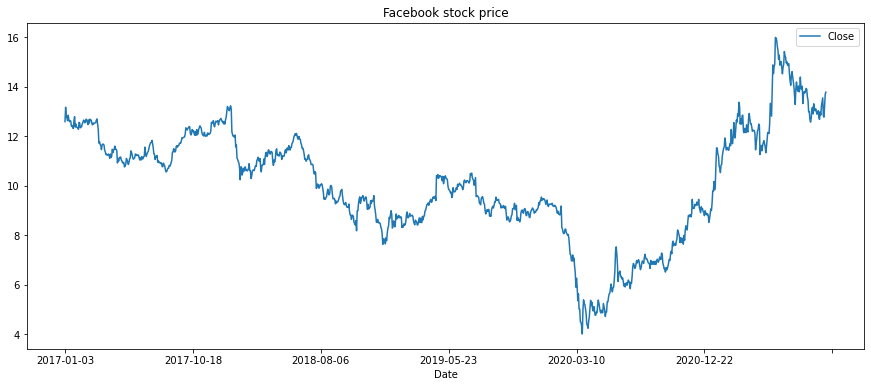

In [5]:
%matplotlib inline
p = df['Close'].plot(figsize=(15,6), legend=True, title="Facebook stock price")

## A. 收益率是否符合正态分布

首先，我们要计算收益率，收益率=今天的收盘价/昨日的收盘价-1

昨日的收盘价，怎么计算呢？

In [6]:
df['Close'].shift(1)

Date
2017-01-03      NaN
2017-01-04    12.59
2017-01-05    13.17
2017-01-06    12.77
2017-01-09    12.76
              ...  
2021-09-20    13.55
2021-09-21    12.82
2021-09-22    12.77
2021-09-23    13.23
2021-09-24    13.71
Name: Close, Length: 1191, dtype: float64

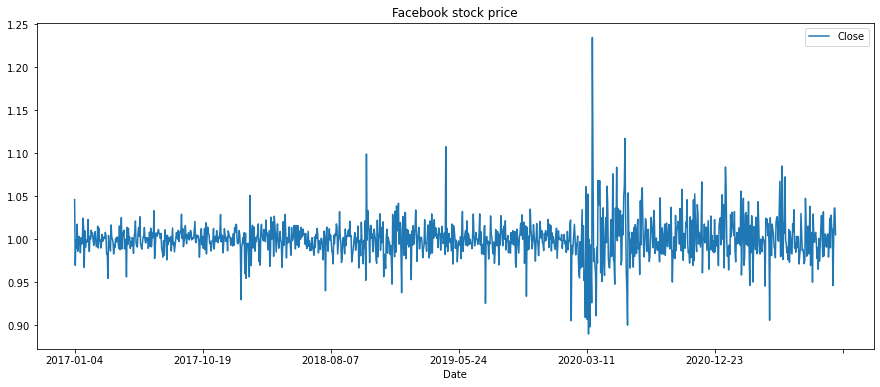

In [18]:
daily_return = df['Close']/df['Close'].shift(1)
daily_return = daily_return.dropna()
p2 = daily_return.plot(figsize=(15,6), legend=True, title="Facebook stock price")

我们看下它的频率分布图

<AxesSubplot:>

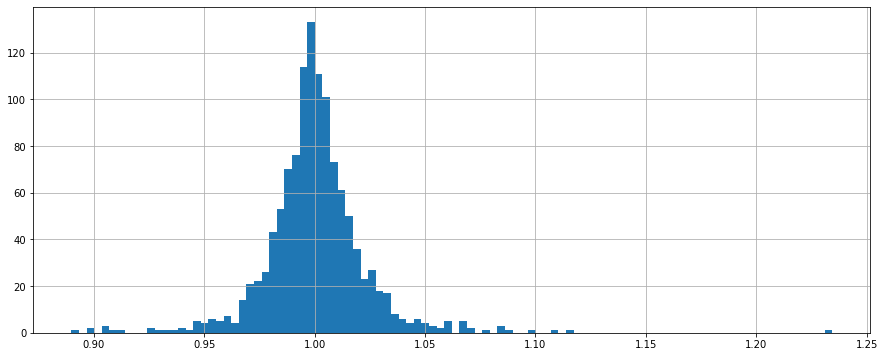

In [19]:
daily_return.hist(bins=100, figsize=(15,6))

收益率像正态分布么？

## B.偏度

偏度（ Skewness）是描述数据分布形态的一个常用统计量，其描述的是某总体取值分布的对称性。这个统计量同样需要与正态分布相比较，偏度为0表示其数据分布形态与正态分布的偏斜程度相同：偏度大于0表示其数据分布形态与正态分布相比为正偏右偏，即有一条长尾巴拖在右边，数据右端有较多的极端值，偏度小于0表示其数据分布形态与正态分布相比为负偏或左偏，即有一条长尾拖在左边，数据左端有较多的极端值，偏度的绝对值数值越大，表示其分布形态的偏斜程度越大

例如，某分布具有许多小的正数和数个大的负值，这种情况是偏度为负，但仍然具有0的平均值，反之亦然（正偏度）。对称分布的偏度为0.正偏度分布中，平均值>中位数众数。负偏度刚好相反，平均值<中位数<众数。在一个完全对称的分布中，即偏度为0，此时平均值=中位数=众数

偏度的计算公式为：

$$
S_k = \frac{n}{(n-1)(n-2)}\frac{\sum_{i=1}^n({X_i-\mu})^3}{\sigma^3}
$$

这里，$S_k$为偏度，$n$是所有观测值的个数，$\mu$是平均值，$\sigma$是标准差偏度的正负符号描述了数据分布的偏斜方向。

我们可以绘制一个正偏度和负偏度的分布，看看其形状。

对于单峰分布，负偏度通常表示尾部在左侧较大（长尾巴拖在左边），而正偏度表示尾部在右侧较大（长尾巴拖在右边）


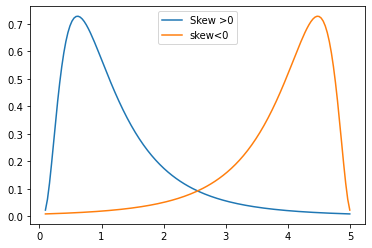

In [20]:
import matplotlib.pyplot as plt

#产生数据
xs2 = np.linspace(stats.lognorm.ppf (0.01, .7, loc =-.1), stats.lognorm.ppf(0.99,.7, loc=-.1),150)

#偏度>0
lognormal= stats.lognorm.pdf(xs2,.7) 
plt.plot(xs2, lognormal, label='Skew >0')

#偏度<0
plt.plot(xs2, lognormal[::-1], label='skew<0')


plt.legend();

计算刚才收益率分布的偏度

In [21]:
daily_return.skew()

0.9017409299600267

是上面图形的哪种情况？

## C.峰度

峰度（Peakness， Kurtosis）是描述总体中所有取值分布形态陡缓程度的统计量。这个统计量需要与正态分布相比较，峰度为3表示该总体数据分布与正态分布的陡缓程度相同；峰度大于3表示该总体数据分布与正态分布相比较为陡峭，为尖顶峰；峰度小于3表示该总体数据分布与正态分布相比较为平坦，为平顶峰。峰度的绝对值数值越大表示其分布形态的陡缓程度与正态分布的差异程度越大。很多情况下，为方便计算，将峰度值－3，因此正态分布的峰度变为0，方便比较。

峰度的具体计算公式为：


$$
K = \frac{n(n+1)}{(n-1)(n-2)(n-3)}\frac{\sum_{i=1}^n({X_i-\mu})^4}{\sigma^4}
$$

尖峰的超额峰度: 3.0
正态分布超额峰度： 0.0
平峰超额峰度： -0.5937628755982794


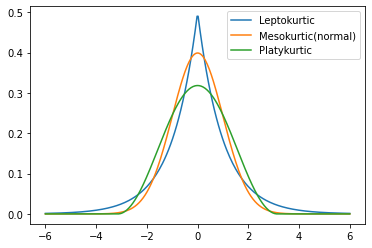

In [22]:
xs = np.linspace(-6, 6, 300)
normal = stats.norm.pdf(xs)
plt.plot(xs, stats.laplace.pdf(xs), label='Leptokurtic')
print('尖峰的超额峰度:', (stats.laplace.stats(moments='k')))
plt.plot(xs, normal, label='Mesokurtic(normal)')
print('正态分布超额峰度：', (stats.norm.stats(moments='k')))
plt.plot(xs, stats.cosine.pdf(xs), label='Platykurtic')
print('平峰超额峰度：', (stats.cosine.stats(moments='k')))
plt.legend();

计算刚才收益率分布的峰度

In [23]:
daily_return.kurt()

12.66550176906793

所以它是
A. 尖峰 
B. 正态 
C. 平峰？

## D. 使用Jarque-Bera的正态检验

Jarque-Bera的正态检验是一个通用的统计检验，可以比较样本数据是否具有与正态分布一样的偏度和峰度。Jarque-Bera检验的零假设是数据服从正态分布，默认p值为0.05

In [24]:
from statsmodels.stats.stattools import jarque_bera

In [30]:
_, pvalue, _, _ = jarque_bera(daily_return.values)

In [31]:
if pvalue > 0.05:
    print('pvalue:', pvalue, '收益率序列服从正态分布。')
else:
    print('pvalue:', pvalue, '收益率序列并不服从正态分布。')

pvalue: 0.0 收益率序列并不服从正态分布。
